# Project 6 – Exploratory Data Analysis  

**Author:** Tamia Goode  
**Purpose:**  Exploratory Data Analysis (EDA) with a specific and unique dataset
**Date:** February 17, 2026  

---

## 
This notebook performs exploratory data analysis (EDA) on the Iris dataset to identify patterns, relationships, and insights through statistical summaries and visualizations.

In [42]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [43]:
# Define column names manually (CSV has no header)
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# Load CSV
df = pd.read_csv("iris.csv", header=None, names=columns)

# Quick look
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
# Shape and info
print("Dataset Shape:", df.shape)
df.info()

# Summary statistics
df.describe().round(2)

Dataset Shape: (150, 5)
<class 'pandas.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    str    
dtypes: float64(4), str(1)
memory usage: 6.0 KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [45]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
pd.DataFrame({"Missing Count": missing, "Missing %": missing_percent})

,Missing Count,Missing %
sepal_length,0,0.0
sepal_width,0,0.0
petal_length,0,0.0
petal_width,0,0.0
species,0,0.0


In [46]:
def detect_outliers(df):
    outliers = {}
    num_cols = df.select_dtypes(include="number").columns
    for col in num_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers[col] = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    return outliers

detect_outliers(df)

{'sepal_length': 0, 'sepal_width': 4, 'petal_length': 0, 'petal_width': 0}

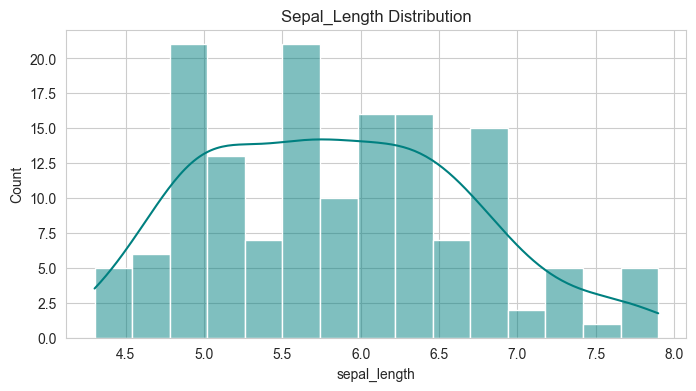

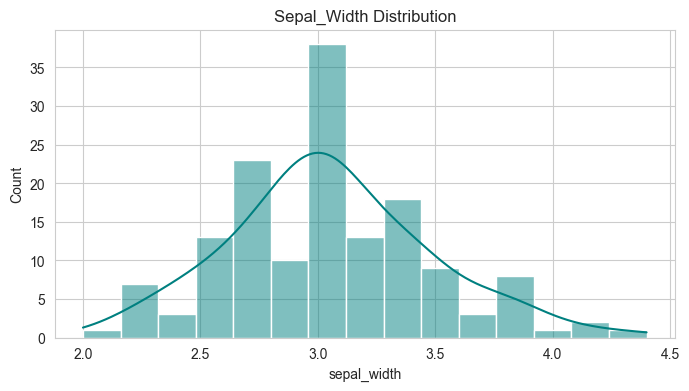

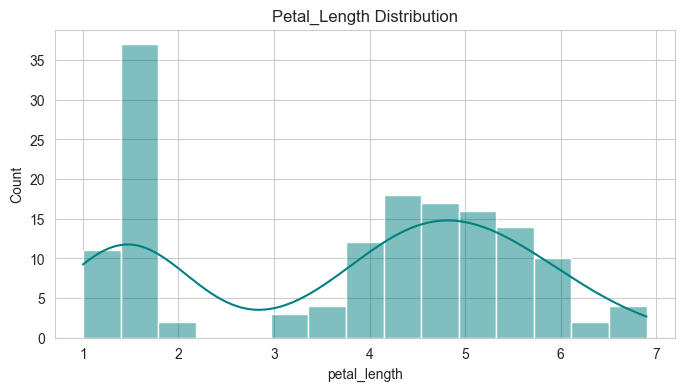

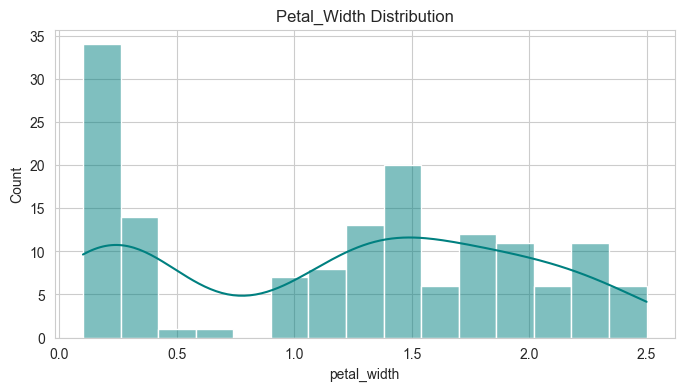

In [47]:
num_cols = df.select_dtypes(include="number").columns

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=15, color="teal")
    plt.title(f"{col.title()} Distribution")
    plt.show()

## Observations

1. The petal length and petal width features clearly separate the Setosa species from the other two species.  
2. The sepal length and sepal width features show some overlap between the Versicolor and Virginica species.  
3. There is a strong positive correlation between petal length and petal width.  
4. The dataset does not contain any missing values, and the number of outliers in numeric features is minimal.  
5. Visualizations such as scatter plots, pairplots, boxplots, and violin plots reveal meaningful patterns that can help distinguish species.